In [ ]:
# import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# import data from hugging face

data_link = "hf://datasets/alalfi/SupplyChainDataset/DataCoSupplyChainDataset1.csv"
df = pd.read_csv(data_link)

c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.head(10)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,Standard Class
5,TRANSFER,6,4,18.58000,294.98001,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018,Standard Class
6,DEBIT,2,1,95.18000,288.42001,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,First Class
7,TRANSFER,2,1,68.43000,285.14001,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,First Class
8,CASH,3,2,133.72000,278.59000,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Second Class
9,CASH,2,1,132.14999,275.31000,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,First Class


In [4]:
df[['Delivery_Status']].value_counts() / df.shape[0]


Delivery_Status  
Late delivery        0.548291
Advance shipping     0.230402
Shipping on time     0.178352
Shipping canceled    0.042954
Name: count, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

In [6]:
df.isnull().sum()

Type                                  0
Days_for_shipping_(real)              0
Days_for_shipment_(scheduled)         0
Benefit_per_order                     0
Sales_per_customer                    0
Delivery_Status                       0
Late_delivery_risk                    0
Category_Id                           0
Category_Name                         0
Customer_City                         0
Customer_Country                      0
Customer_Email                        0
Customer_Fname                        0
Customer_Id                           0
Customer_Lname                        8
Customer_Password                     0
Customer_Segment                      0
Customer_State                        0
Customer_Street                       0
Customer_Zipcode                      3
Department_Id                         0
Department_Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
df.describe()

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Customer_Id,Customer_Zipcode,Department_Id,Latitude,...,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Price,Product_Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24843.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772097,183.107609,21.974989,55420.648070,692.509764,31.851451,NaN,141.232547,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31921.252921,336.446807,15.640064,NaN,139.732489,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937550,...,1.000000,9.990000,7.490000,-4274.980000,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.380000,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265430,...,1.000000,119.980000,104.380000,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990010,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144860,...,1.000000,199.920000,163.990010,31.520000,59405.000000,627.000000,29.000000,NaN,59.990000,0.0
75%,5.000000,4.000000,64.800000,247.399990,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279620,...,3.000000,299.950010,247.399990,64.800000,90008.000000,1004.000000,45.000000,NaN,199.990000,0.0
max,6.000000,4.000000,911.799990,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781930,...,5.000000,1999.989990,1939.989990,911.800000,99301.000000,1363.000000,76.000000,NaN,1999.990000,0.0


In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique(),'\n')

Type
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT'] 

Days_for_shipping_(real)
[3 5 4 2 6 0 1] 

Days_for_shipment_(scheduled)
[4 1 2 0] 

Benefit_per_order
[  91.25    -249.09    -247.78    ... -103.97    -237.59    -337.10001] 

Sales_per_customer
[314.64001 311.35999 309.72    ... 298.76999 403.70999 474.76001] 

Delivery_Status
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled'] 

Late_delivery_risk
[0 1] 

Category_Id
[73 17 29 24 13 12  9 41 37 38 44  3 18 43 65 62 64  4  2 26 40 76 66 70
  6 11 16 36 10 63  5 60 45 59 67 61 68  7 72 69 71 75 35 34 33 32 31 30
 74 48 46] 

Category_Name
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 

In [9]:
# =============================================
# 1. DATA CLEANING & FEATURE SELECTION
# =============================================

def clean_numeric(col):
    """Fix problematic numeric columns"""
    if pd.api.types.is_string_dtype(col):
        col = col.str.replace(',', '').str.replace('k', '000')
        col = col.str.replace(r'(\d+)\.(\d+)\.(\d+)', r'\1\2.\3', regex=True)
    return pd.to_numeric(col, errors='coerce')

# Clean numeric columns
numeric_cols = ['Benefit_per_order', 'Sales_per_customer', 'Order_Item_Product_Price',
                'Order_Item_Total', 'Order_Profit_Per_Order', 'Product_Price']
for col in numeric_cols:
    df[col] = clean_numeric(df[col])

# Selected features (mix of numeric and categorical)
features = [
    # Numeric features
    'Days_for_shipping_(real)',
    'Days_for_shipment_(scheduled)',
    'Order_Item_Quantity',
    'Order_Item_Discount_Rate',
    'Benefit_per_order',
    'Order_Item_Profit_Ratio',
    'Late_delivery_risk',  # Binary feature

    # Categorical features (will be encoded)
    'Shipping_Mode',
    'Market',
    'Order_Region',
    'Customer_Country'
]

# Target variable
target = 'Delivery_Status'

# Create working dataframe
model_df = df[features + [target]].copy()

In [10]:
# =============================================
# 2. FEATURE ENCODING
# =============================================

# Initialize encoders dictionary to store mappings
encoders = {}

# Encode categorical features
categorical_cols = ['Shipping_Mode', 'Market', 'Order_Region', 'Customer_Country']
for col in categorical_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))
    encoders[col] = le  # Store encoder for reference

    # Print encoding mapping
    print(f"\n{col} Encoding:")
    print(dict(zip(le.classes_, range(len(le.classes_)))))

# Encode target variable
target_encoder = LabelEncoder()
model_df[target] = target_encoder.fit_transform(model_df[target])
print(f"\nTarget ({target}) Encoding:")
print(dict(zip(target_encoder.classes_, range(len(target_encoder.classes_)))))


Shipping_Mode Encoding:
{'First Class': 0, 'Same Day': 1, 'Second Class': 2, 'Standard Class': 3}

Market Encoding:
{'Africa': 0, 'Europe': 1, 'LATAM': 2, 'Pacific Asia': 3, 'USCA': 4}

Order_Region Encoding:
{'Canada': 0, 'Caribbean': 1, 'Central Africa': 2, 'Central America': 3, 'Central Asia': 4, 'East Africa': 5, 'East of USA': 6, 'Eastern Asia': 7, 'Eastern Europe': 8, 'North Africa': 9, 'Northern Europe': 10, 'Oceania': 11, 'South America': 12, 'South Asia': 13, 'South of  USA': 14, 'Southeast Asia': 15, 'Southern Africa': 16, 'Southern Europe': 17, 'US Center': 18, 'West Africa': 19, 'West Asia': 20, 'West of USA': 21, 'Western Europe': 22}

Customer_Country Encoding:
{'EE. UU.': 0, 'Puerto Rico': 1}

Target (Delivery_Status) Encoding:
{'Advance shipping': 0, 'Late delivery': 1, 'Shipping canceled': 2, 'Shipping on time': 3}


In [11]:
# =============================================
# 3. DATA SPLITTING
# =============================================

X = model_df.drop(target, axis=1)
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# =============================================
# 4. XGBOOST MODEL TRAINING
# =============================================

model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42,
    early_stopping_rounds=10
)

# Train with validation set
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-mlogloss:1.20277
[1]	validation_0-mlogloss:1.05558
[2]	validation_0-mlogloss:0.93399
[3]	validation_0-mlogloss:0.83157
[4]	validation_0-mlogloss:0.74412
[5]	validation_0-mlogloss:0.66870
[6]	validation_0-mlogloss:0.60316
[7]	validation_0-mlogloss:0.54588
[8]	validation_0-mlogloss:0.49559
[9]	validation_0-mlogloss:0.45126
[10]	validation_0-mlogloss:0.41208
[11]	validation_0-mlogloss:0.37736
[12]	validation_0-mlogloss:0.34654
[13]	validation_0-mlogloss:0.31912
[14]	validation_0-mlogloss:0.29470
[15]	validation_0-mlogloss:0.27292
[16]	validation_0-mlogloss:0.25348
[17]	validation_0-mlogloss:0.23563
[18]	validation_0-mlogloss:0.21979
[19]	validation_0-mlogloss:0.20566
[20]	validation_0-mlogloss:0.19302
[21]	validation_0-mlogloss:0.18170
[22]	validation_0-mlogloss:0.17156
[23]	validation_0-mlogloss:0.16245
[24]	validation_0-mlogloss:0.15428
[25]	validation_0-mlogloss:0.14693
[26]	validation_0-mlogloss:0.14033
[27]	validation_0-mlogloss:0.13439
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)


Model Performance:
Accuracy: 0.98

Classification Report:
                   precision    recall  f1-score   support

 Advance shipping       0.96      1.00      0.98      8318
    Late delivery       1.00      1.00      1.00     19796
Shipping canceled       1.00      0.58      0.73      1551
 Shipping on time       0.96      1.00      0.98      6439

         accuracy                           0.98     36104
        macro avg       0.98      0.90      0.92     36104
     weighted avg       0.98      0.98      0.98     36104



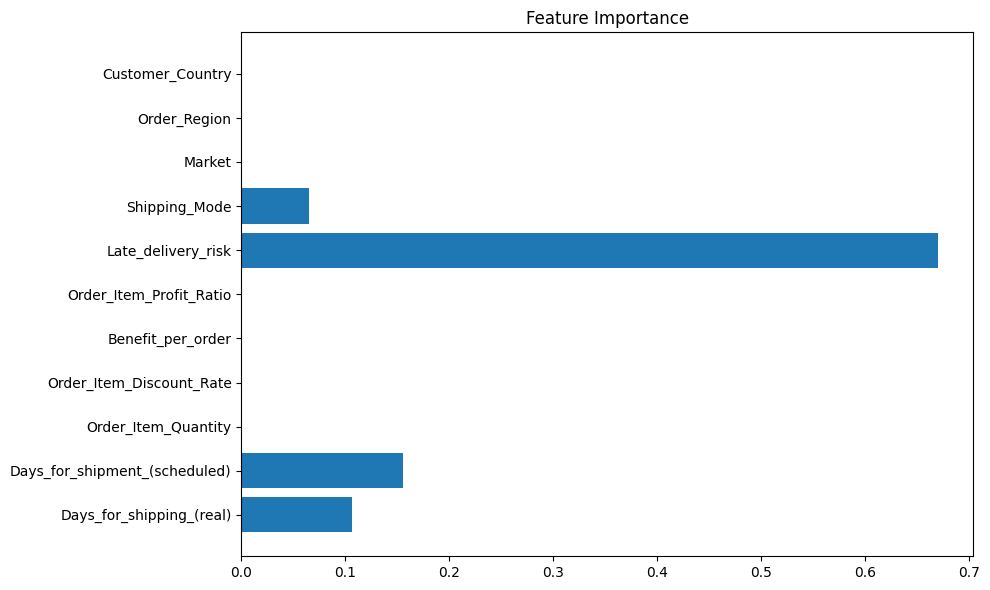

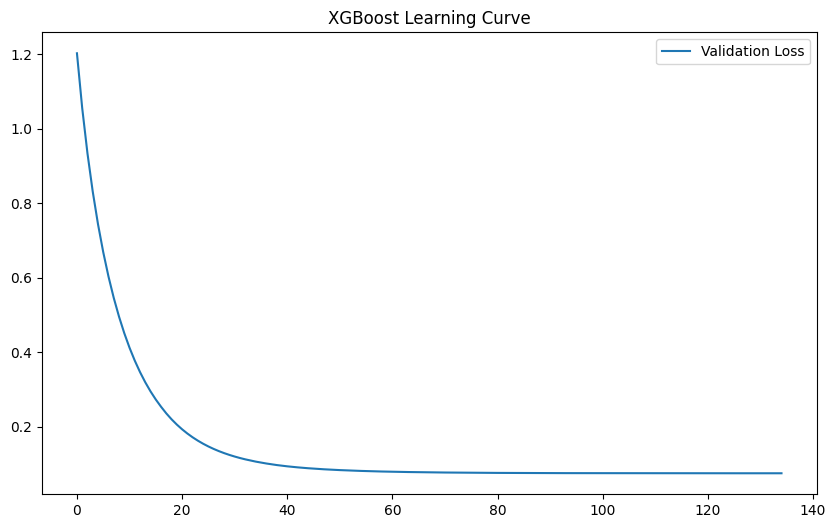

In [14]:
# =============================================
# 5. MODEL EVALUATION
# =============================================

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=target_encoder.classes_
))


# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Learning Curve
results = model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['mlogloss'], label='Validation Loss')
plt.legend()
plt.title("XGBoost Learning Curve")
plt.show()